# Iris Data Analysis using Classification 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class_labels']

In [3]:
df = pd.read_csv('iris dataset.csv', names = columns)
df.head()

,sepal length,sepal width,petal length,petal width,class_labels
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Histogram Plots

<AxesSubplot:>

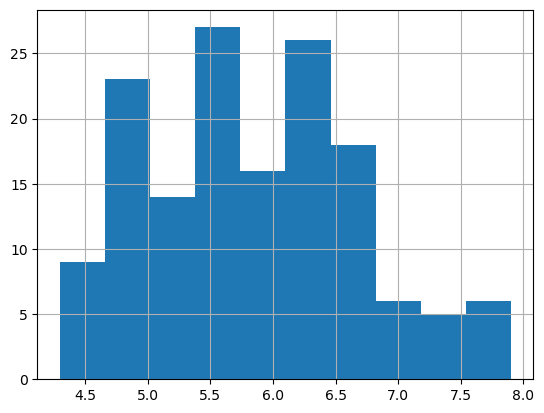

In [6]:
df['sepal length'].hist()

<AxesSubplot:>

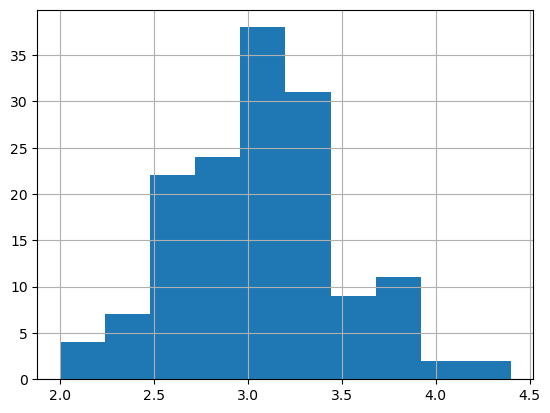

In [7]:
df['sepal width'].hist()

<AxesSubplot:>

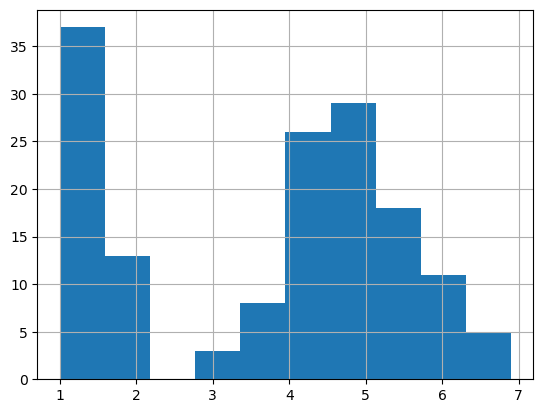

In [8]:
df['petal length'].hist()

<AxesSubplot:>

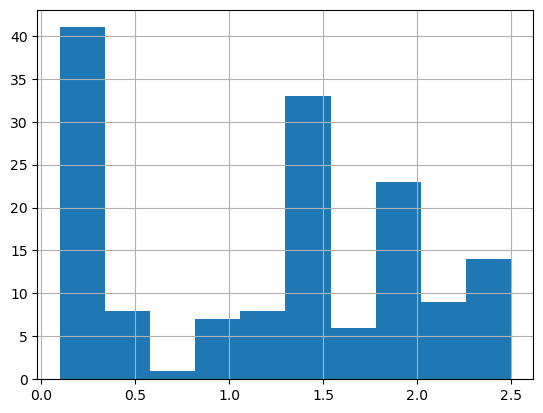

In [9]:
df['petal width'].hist()

## Scatter plot

In [10]:
df['class_labels'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
colors = ['red','green', 'yellow']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [12]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'class_labels'],
      dtype='object')

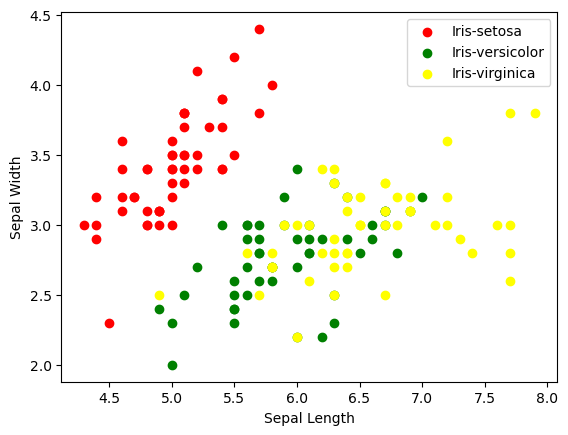

In [13]:
for i in range(3):
    x = df[df['class_labels'] == species[i]]
    plt.scatter(x['sepal length'], x['sepal width'], c = colors[i], label = species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

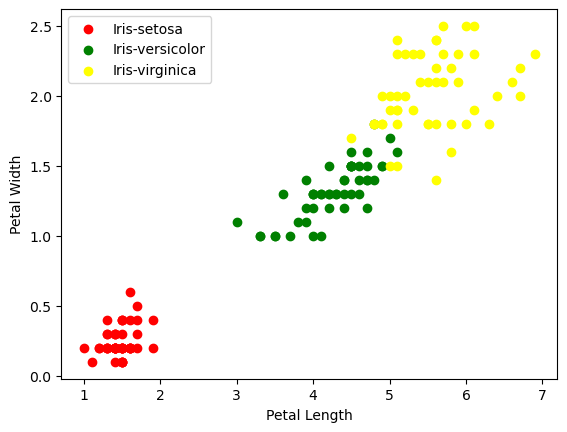

In [14]:
for i in range(3):
    x = df[df['class_labels'] == species[i]]
    plt.scatter(x['petal length'], x['petal width'], c = colors[i], label = species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

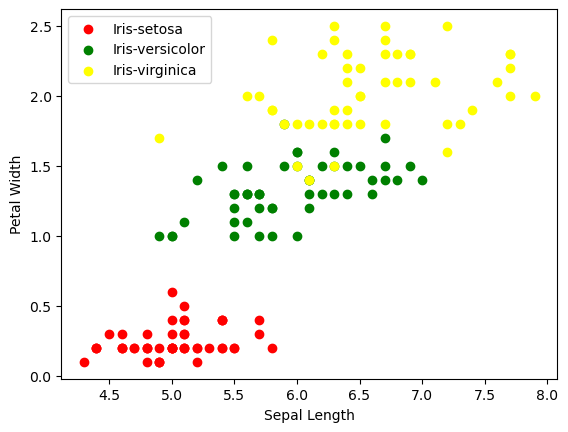

In [15]:
for i in range(3):
    x = df[df['class_labels'] == species[i]]
    plt.scatter(x['sepal length'], x['petal width'], c = colors[i], label = species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()

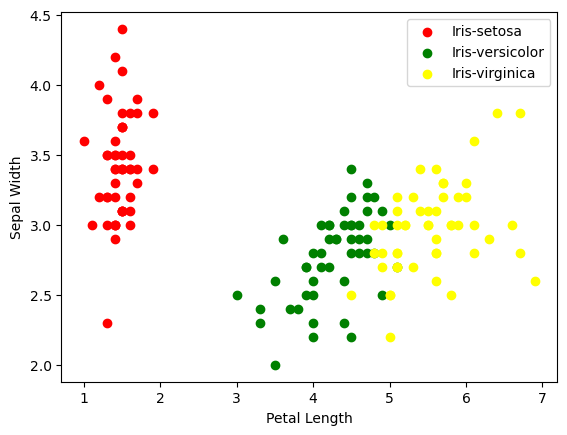

In [16]:
for i in range(3):
    x = df[df['class_labels'] == species[i]]
    plt.scatter(x['petal length'], x['sepal width'], c = colors[i], label = species[i])

plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend()

## Correlation Matrix

In [17]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

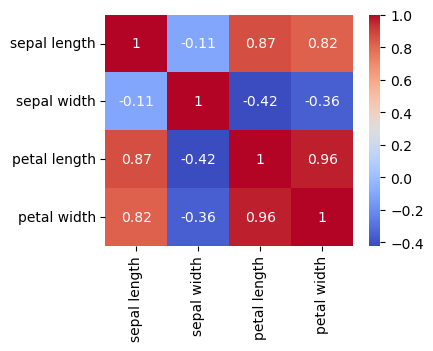

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize= (4,3))
sns.heatmap(corr, annot = True, ax =ax, cmap = 'coolwarm')

## Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['class_labels'] = le.fit_transform(df['class_labels'])
df.head()

,sepal length,sepal width,petal length,petal width,class_labels
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


## Model Testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns = 'class_labels')
y = df['class_labels']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [25]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
acc = model_lr.score(X_test, y_test)
acc

1.0

### Knn - k nearest neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [28]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
acc = model_knn.score(X_test, y_test)
acc

C:\Users\Mustafizur Rahman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()

In [31]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
acc_dtc = model_dtc.score(X_test, y_test)
acc_dtc

1.0